In [1]:
import sys
print(sys.executable)
print(sys.version)

/opt/homebrew/opt/python@3.12/bin/python3.12
3.12.4 (main, Jun  6 2024, 18:26:44) [Clang 15.0.0 (clang-1500.3.9.4)]


In [23]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
columns_desc = {
    'CUST_ID': 'Идентификация держателя кредитной карты (категориальный)',
    'BALANCE': 'Сумма остатка на счету для совершения покупок',
    'BALANCE_FREQUENCY': 'Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не обновляется)',
    'PURCHASES': 'Сумма покупок, сделанных со счета',
    'ONEOFF_PURCHASES': 'Максимальная сумма единовременной покупки',
    'INSTALLMENTS_PURCHASES': 'Сумма покупок, сделанных в рассрочку',
    'CASH_ADVANCE': 'Сумма аванса наличными, выданного пользователю',
    'PURCHASES_FREQUENCY': 'Как часто совершаются покупки, оценка от 0 до 1 (1 = часто покупается, 0 = не покупается)',
    'ONEOFF_PURCHASES_FREQUENCY': 'Как часто совершаются единовременные покупки (1 = часто покупается, 0 = не покупается)',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'Как часто совершаются покупки в рассрочку (1 = часто, 0 = не часто)',
    'CASH_ADVANCE_FREQUENCY': 'Как часто выплачивается аванс наличными',
    'CASH_ADVANCE_TRX': 'Количество транзакций, совершенных с использованием аванса наличными',
    'PURCHASES_TRX': 'Количество транзакций по покупкам',
    'CREDIT_LIMIT': 'Кредитный лимит пользователя по кредитной карте',
    'PAYMENTS': 'Сумма платежей, совершенных пользователем',
    'MINIMUM_PAYMENTS': 'Минимальная сумма платежей, совершенных пользователем',
    'PRC_FULL_PAYMENT': 'Процент полностью оплаченных платежей пользователем',
    'TENURE': 'Срок обслуживания по кредитной карте для пользователя'
}

In [4]:
data = pd.read_csv('customer_credit_card_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
for col in data.columns:
    print(f"{col:<35} {columns_desc.get(col, col):<100} {len(data[col].unique())}")

CUST_ID                             Идентификация держателя кредитной карты (категориальный)                                             8950
BALANCE                             Сумма остатка на счету для совершения покупок                                                        8871
BALANCE_FREQUENCY                   Как часто обновляется баланс, оценка от 0 до 1 (1 = часто обновляется, 0 = не обновляется)           43
PURCHASES                           Сумма покупок, сделанных со счета                                                                    6203
ONEOFF_PURCHASES                    Максимальная сумма единовременной покупки                                                            4014
INSTALLMENTS_PURCHASES              Сумма покупок, сделанных в рассрочку                                                                 4452
CASH_ADVANCE                        Сумма аванса наличными, выданного пользователю                                                       4323
PURCHASE

# Dataset proc

In [7]:
data.set_index('CUST_ID', inplace=True)

In [8]:
cat_features = []
num_features = data.columns
print(f"{len(cat_features)=}")
print(f"{len(num_features)=}")

len(cat_features)=0
len(num_features)=17


In [9]:
data.shape

(8950, 17)

In [10]:
data.dropna(inplace=True)
data.shape

(8636, 17)

In [11]:
data.drop_duplicates(inplace=True)
data.shape

(8636, 17)

In [12]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


# PCA

In [13]:
%%time
pca_result = PCA(n_components=3).fit_transform(data)
pca_columns = [f"pca{i+1}" for i in range(pca_result.shape[1])]
data[pca_columns] = pca_result

CPU times: user 9.27 ms, sys: 1.87 ms, total: 11.1 ms
Wall time: 3.92 ms


In [14]:
data[pca_columns]

,pca1,pca2,pca3
CUST_ID,,,
C10001,-4391.447490,911.247469,216.280956
C10002,4044.634211,-2565.160177,2127.389657
C10003,1418.394845,-1924.557181,-2194.007989
C10005,-3809.046707,728.326687,528.642293
C10006,-1966.891227,850.605183,1981.805120
...,...,...,...
C19184,-4853.633050,1050.840452,367.778934
C19186,-4272.993473,1113.435626,176.037493
C19188,-4444.593070,905.467485,134.397897


# TSNE

In [17]:
%%time
tsne_result = TSNE(n_components=3).fit_transform(data)
tsne_columns = [f"tsne{i+1}" for i in range(tsne_result.shape[1])]
data[tsne_columns] = tsne_result

CPU times: user 3min 48s, sys: 53.9 s, total: 4min 42s
Wall time: 33.5 s


In [18]:
data[tsne_columns]

,tsne1,tsne2,tsne3
CUST_ID,,,
C10001,-14.699445,14.538490,11.400802
C10002,10.736235,0.184117,8.060932
C10003,13.627846,-5.004032,-5.017954
C10005,-10.277678,3.669243,17.767378
C10006,-4.566981,-6.159623,10.057132
...,...,...,...
C19184,-1.770189,17.822166,9.827170
C19186,-13.279610,17.808884,7.154590
C19188,-15.567560,16.280832,12.299603


# SAVE DATA

In [23]:
# data.to_parquet('proc_data')

In [3]:
data = pd.read_parquet('proc_data')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, C10001 to C19190
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CRED

In [5]:
tsne_columns = [f"tsne{i+1}" for i in range(3)]
pca_columns = [f"pca{i+1}" for i in range(3)]
pca_tsne_cols = tsne_columns + pca_columns

# Test HDBSCAN

In [17]:
from sklearn.cluster import HDBSCAN

In [18]:
test_hdbscan_data = data.copy()

In [19]:
%%time
hdbscan = HDBSCAN(min_cluster_size=100)
cluster = hdbscan.fit_predict(test_hdbscan_data.drop(pca_tsne_cols, axis=1))
test_hdbscan_data["cluster"] = cluster

CPU times: user 718 ms, sys: 10.2 ms, total: 728 ms
Wall time: 753 ms


In [20]:
len(cluster), len(set(cluster))

(8636, 4)

In [21]:
test_hdbscan_data.cluster.value_counts()

cluster
-1    7663
 1     506
 2     285
 0     182
Name: count, dtype: int64

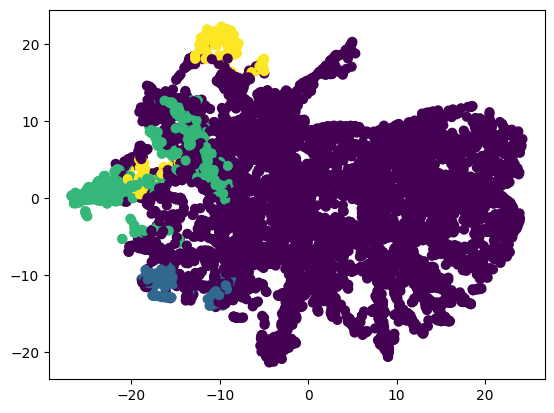

In [27]:
plt.scatter(x='tsne1', y='tsne3', c='cluster', s=40, cmap='viridis', data=test_hdbscan_data)

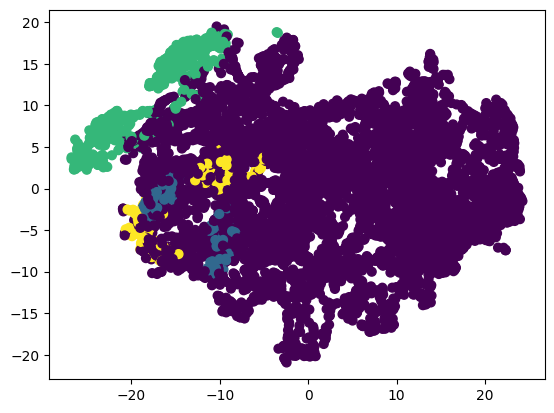

In [28]:
plt.scatter(x='tsne1', y='tsne2', c='cluster', s=40, cmap='viridis', data=test_hdbscan_data)

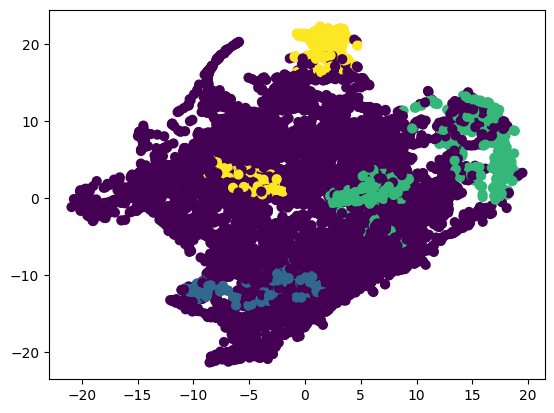

In [30]:
plt.scatter(x='tsne2', y='tsne3', c='cluster', s=40, cmap='viridis', data=test_hdbscan_data)

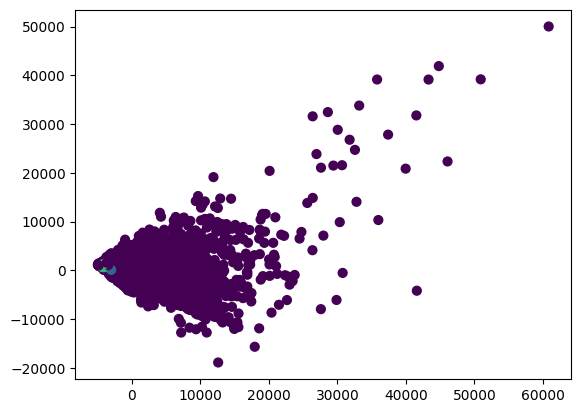

In [32]:
plt.scatter(x='pca1', y='pca2', c='cluster', s=40, cmap='viridis', data=test_hdbscan_data)

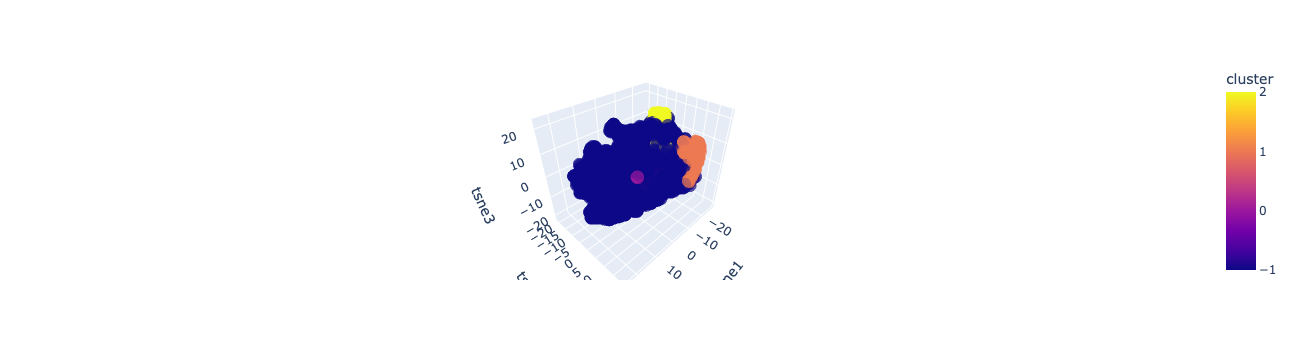

In [22]:
px.scatter_3d(
    test_hdbscan_data,
    x='tsne1',
    y='tsne2',
    z='tsne3',
    color='cluster',
    opacity=0.7,
)

# HDBSCAN

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
hdbscan_data = data.copy()

In [ ]:
scaler = 